# 4.09 Task

## Table of Contents
1. Import Libraries + Data
2. Visualizations
3. Sampling Data
4. Scatterplot

# 01. Import Libraries + Data

In [1]:
# Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define path
path = r'/Users/alliecarlisle/Desktop/CareerFoundry_Data_Analytics/Instacart Basket Analysis'

In [3]:
# final dataframe
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_merge.pkl'))

In [4]:
df_final.shape

(30328763, 30)

In [5]:
df_final.head(5)

,user_id,first_name,last_name,state,age,n_dependants,family_status,income,order_id,order_number,...,price_range_loc,busiest_days,busiest_time_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,_merge
0,26711,Deborah,Esquivel,Missouri,48,3,married,165665,2543867,5,...,Mid-range product,Busiest days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Missouri,48,3,married,165665,1285508,7,...,Mid-range product,Regular days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Missouri,48,3,married,165665,2578584,8,...,Mid-range product,Busiest days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Missouri,48,3,married,165665,423547,2,...,Mid-range product,Regular days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Missouri,48,3,married,165665,2524893,3,...,Mid-range product,Slowest days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both


In [6]:
# display all columns
pd.options.display.max_columns = None

In [7]:
df_final.columns

Index(['user_id', 'first_name', 'last_name', 'state', 'age', 'n_dependants',
       'family_status', 'income', 'order_id', 'order_number',
       'orders_day_of_the_week', 'order_hour_of_day', 'time_between_orders',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_time_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days', 'frequency_flag',
       '_merge'],
      dtype='object')

In [23]:
df_final.age.dtype

dtype('int64')

# 02. Visualizations

### Histogram

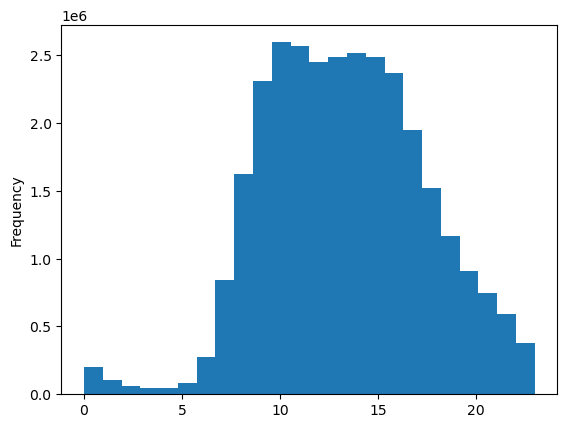

In [8]:
# histogram for order_hour_of_day
hist = df_final['order_hour_of_day'].plot.hist(bins = 24)

In [9]:
# export to visualizations folder
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

### Observation - The highest frequency for orders placed is during 9am - 4pm. This makes sense, as this is during the day whereas order frequency is very low during night-time hours. 

### Bar Chart

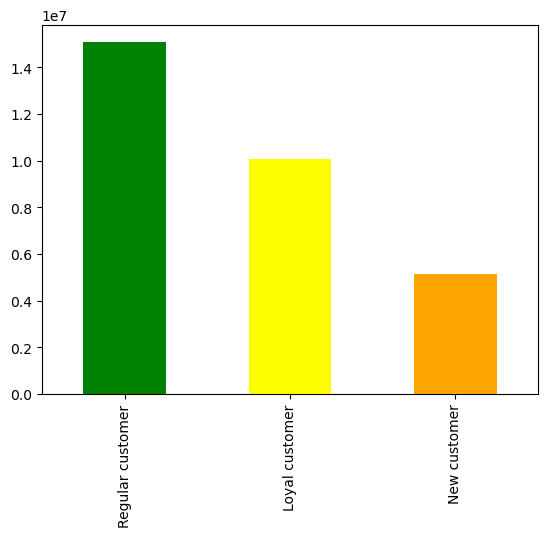

In [10]:
# bar chart for loyalty flag
bar = df_final['loyalty_flag'].value_counts().plot.bar(color = ['green', 'yellow', 'orange'])

In [11]:
# export bar chart as an image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

# 03. Sampling Data

In [12]:
# create a list to test np.random.rand()
np.random.seed(4)
dev = np.random.rand(len(df_final)) <= 0.7

In [13]:
dev

array([False,  True, False, ...,  True, False,  True])

In [14]:
np.random.rand(10)

array([0.38249654, 0.86075523, 0.52050071, 0.76980339, 0.95770057,
       0.65565091, 0.77542577, 0.2051172 , 0.66590939, 0.42935793])

In [15]:
# store 70% of the sample in big
big = df_final[dev]

In [16]:
# store 30% of the sample in small
small = df_final[~dev]

In [17]:
# check
len(df_final)

30328763

In [18]:
# check
len(big) + len(small)

30328763

In [19]:
# speed up processing time
df_final_2 = small[['order_hour_of_day', 'prices']]

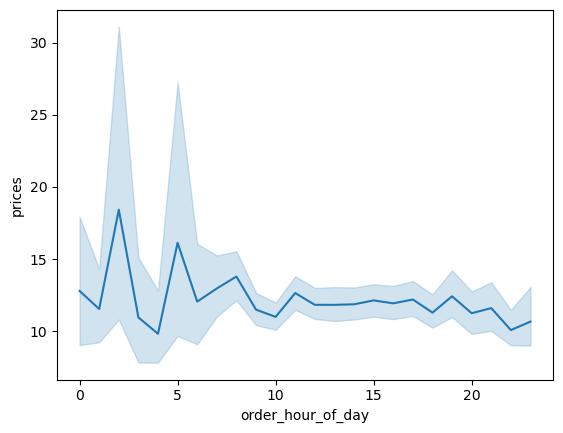

In [20]:
# create line chart 
line = sns.lineplot(data = df_final_2, x = 'order_hour_of_day', y = 'prices')

### Observation - middle of the night purchases have a couple spikes in price, before the 9am-4pm. When order frequency is lower, the prices vary. When order frequency is high, prices level out between 10-15 dollars. 

In [21]:
# export line chart as an image
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_time_prices.png'))

In [24]:
# create line chart for age and dependants (speed up processing time)
df_final_3 = small [['age', 'family_status']]

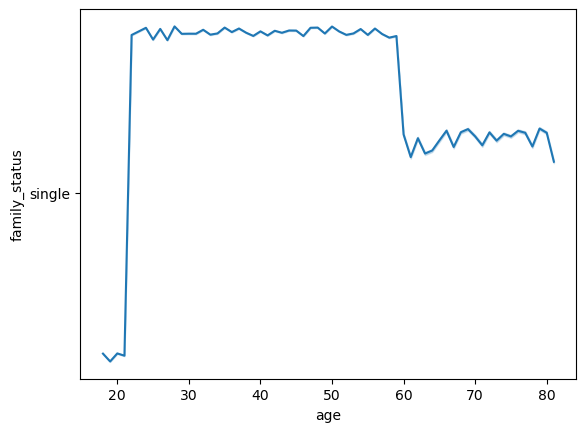

In [25]:
# create line chart for age and dependants
line_2 = sns.lineplot(data = df_final_3, x = 'age', y = 'family_status')

In [26]:
# export line chart 2 as an image
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_family_status.png'))

### Observation - it looks like the customers closest to age 20 identify as single and most customers aged mid 20's to 60 are married with a drop happending afterwards hovering around single. I would assume this means they are divorce or a spouse died. I'm struggling to tell from the graph. 

# 04. Scatterplot

In [27]:
# scatterplot for age and income (speed up processing time)
df_final_4 = small [['age', 'income']]

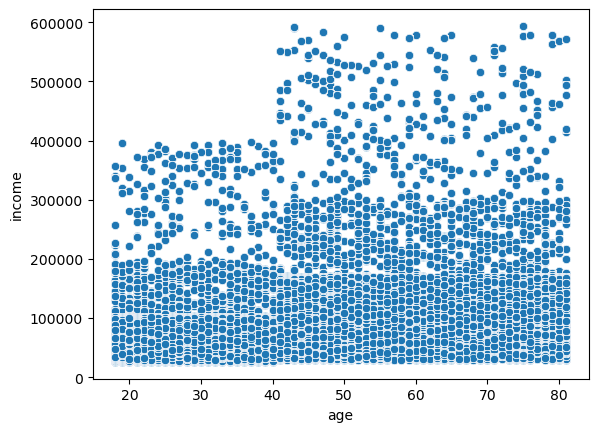

In [28]:
# scatterplot for age and income
scatter = sns.scatterplot(data = df_final_4, x = 'age', y = 'income')

In [29]:
# export scatterplot as an image
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))

### Observation - there is a positive relationship between age and income as the dots rise to the right. Also, it looks like there's a jump around age 40.